<a href="https://colab.research.google.com/github/hemasrivarma11/loan-approval-decision-tree/blob/main/DECISIONTREE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()   # Choose your CSV file from your computer


Saving Loan_approval_data_2025.csv to Loan_approval_data_2025.csv


In [19]:
# 1. Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text

# 2. Load dataset (after you upload CSV in Colab)
df = pd.read_csv("Loan_approval_data_2025.csv")   # or whatever your CSV is named

# 3. Preprocess — e.g. drop missing values
df = df.dropna()

# 4. Select features (X) and target (y)
# Replace with actual column names from your dataset
feature_cols = ["occupation_status", "age", "annual_income","credit_score","loan_amount"]
target_col = "loan_status"  # or whatever the class label column is

X = df[feature_cols]
y = df[target_col]

# 5. Convert categorical to numeric if needed
X = pd.get_dummies(X)
if y.dtype == object:
    y = pd.factorize(y)[0]

# 6. Split (optional, but for generalization)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Fit Decision Tree with Gini criterion
clf = DecisionTreeClassifier(criterion="gini", random_state=42)
clf.fit(X_train, y_train)

# 8. Inspect the tree structure (optional)
print(export_text(clf, feature_names=list(X.columns)))

# 9. Get Gini impurity / node stats
tree = clf.tree_
n_nodes = tree.node_count
impurities = tree.impurity        # array of impurity (Gini) for each node
node_samples = tree.n_node_samples  # number of samples reaching each node

print("Node  |  # samples  |  Gini impurity")
for i in range(n_nodes):
    print(f"{i:4d}  |  {node_samples[i]:6d}  |  {impurities[i]:.4f}")

# 10. (Optional) Compute weighted average Gini after splitting (leaf-level)
leaves = [i for i in range(n_nodes) if tree.children_left[i] == tree.children_right[i]]
total = len(X_train)
weighted = sum((node_samples[i]/total)*impurities[i] for i in leaves)
print("Weighted avg Gini at leaves:", weighted)

# 11. (Optional) Print Gini of root (before any split)
print("Root node impurity (before any split):", impurities[0])
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Streaming output truncated to the last 5000 lines.
12843  |      10  |  0.4200
12844  |       3  |  0.4444
12845  |       1  |  0.0000
12846  |       2  |  0.0000
12847  |       7  |  0.2449
12848  |       6  |  0.0000
12849  |       1  |  0.0000
12850  |      20  |  0.5000
12851  |       6  |  0.2778
12852  |       1  |  0.0000
12853  |       5  |  0.0000
12854  |      14  |  0.4592
12855  |       6  |  0.4444
12856  |       1  |  0.0000
12857  |       5  |  0.3200
12858  |       3  |  0.0000
12859  |       2  |  0.5000
12860  |       1  |  0.0000
12861  |       1  |  0.0000
12862  |       8  |  0.2188
12863  |       2  |  0.5000
12864  |       1  |  0.0000
12865  |       1  |  0.0000
12866  |       6  |  0.0000
12867  |      12  |  0.4444
12868  |       4  |  0.0000
12869  |       8  |  0.5000
12870  |       6  |  0.4444
12871  |       3  |  0.4444
12872  |       2  |  0.0000
12873  |       1  |  0.0000
12874  |       3  |  0.0000
12875  |       2  |  0.0000
12876  |      65  |  0.38

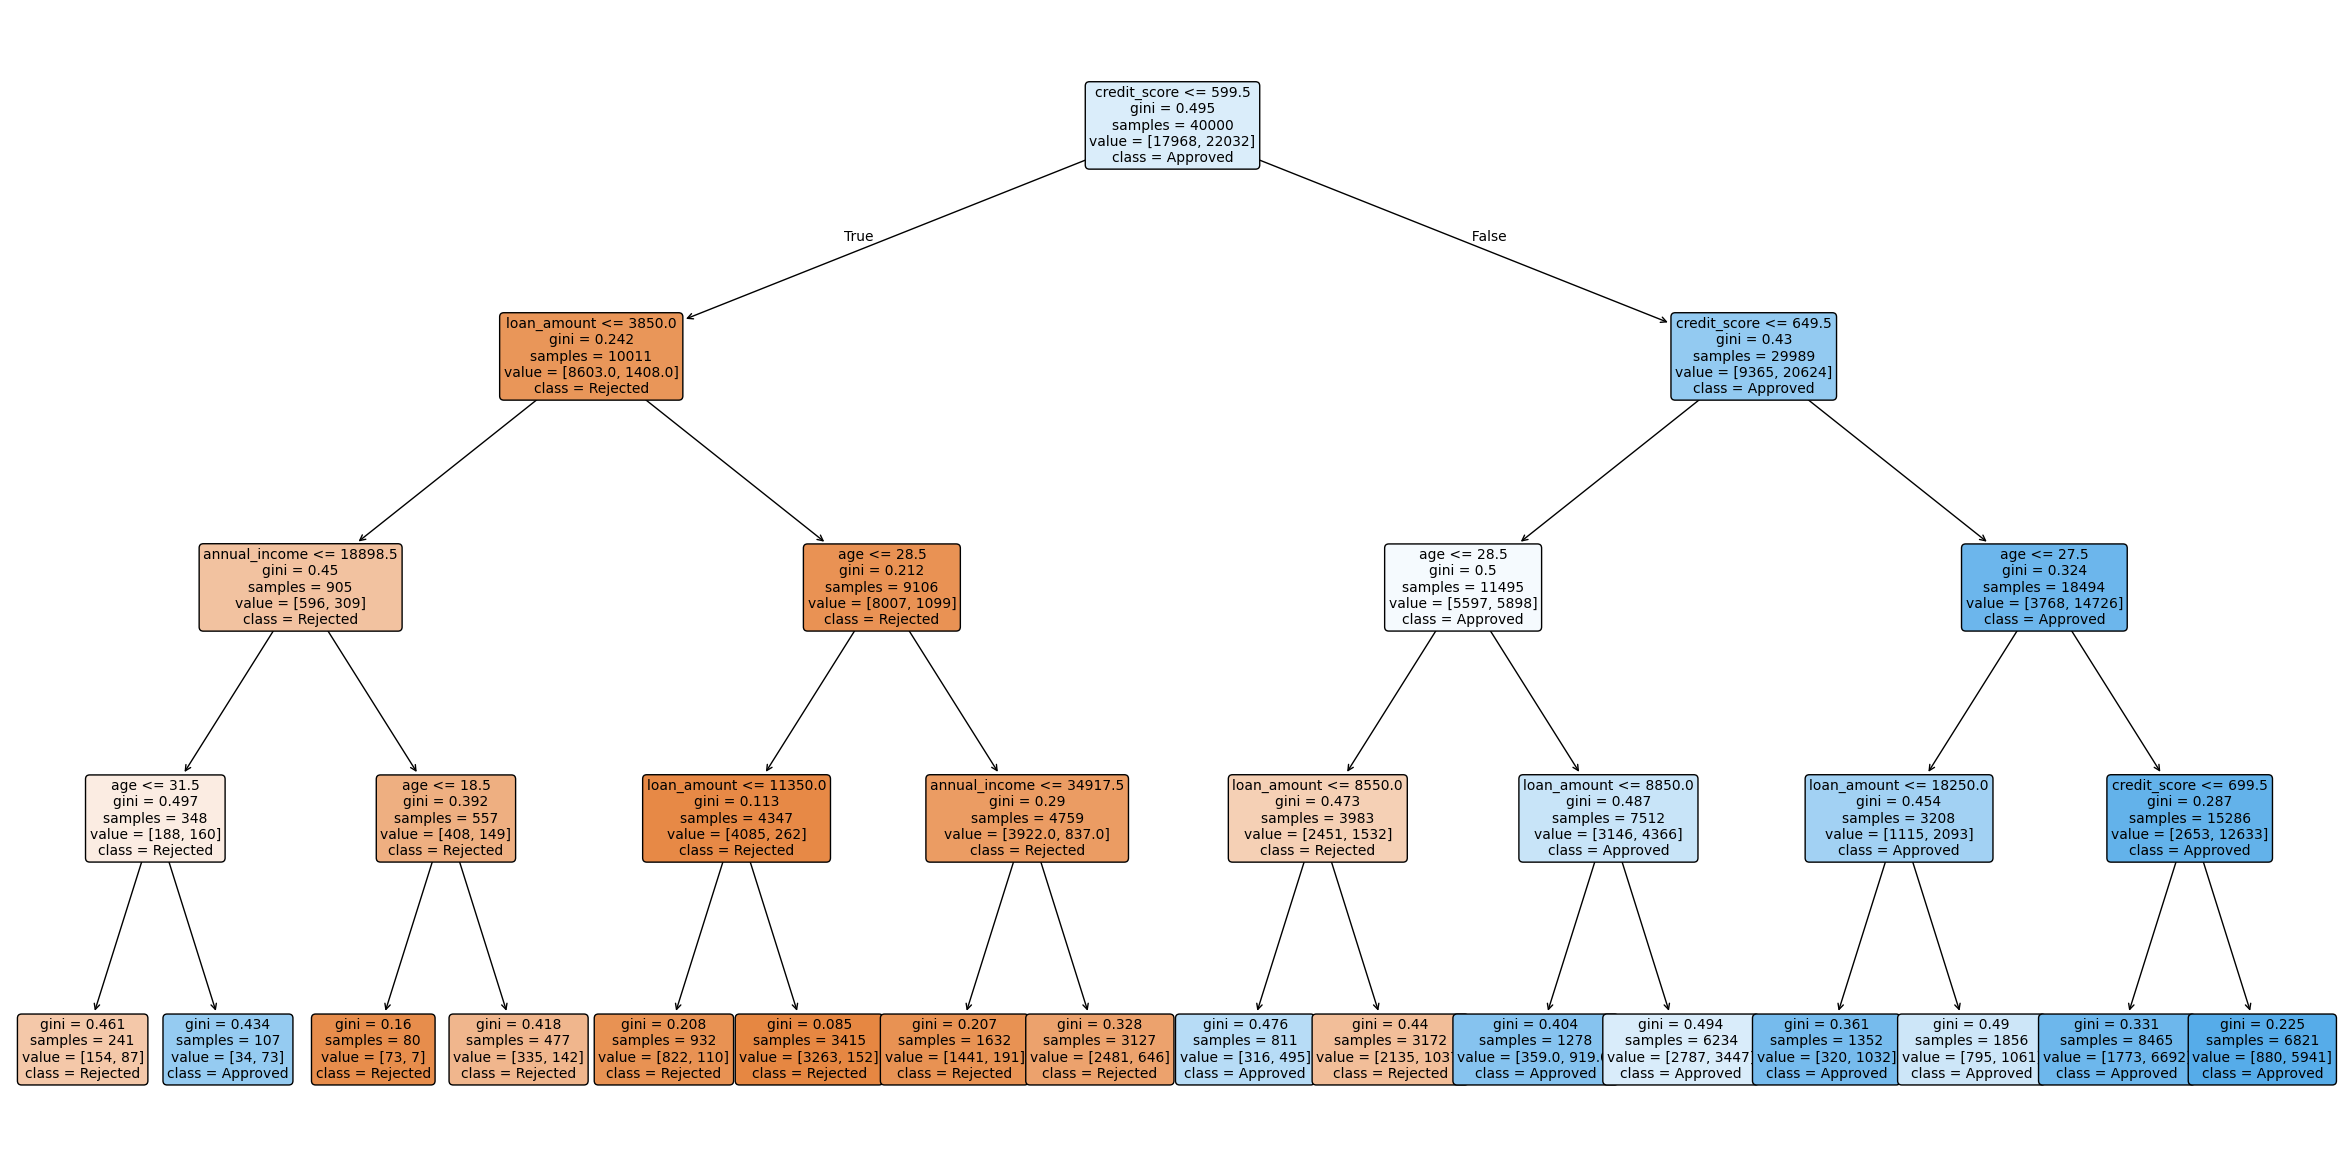

In [15]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
plt.figure(figsize=(30, 15))  # controls size of the tree

# Create a new classifier with max_depth=4 specifically for plotting, if desired.
# If you want to plot the original, full tree, remove these two lines.
clf_plot = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=42)
clf_plot.fit(X_train, y_train)

plot_tree(
    clf_plot, # Use clf_plot here if you want a depth-limited tree, otherwise use the original 'clf'
    feature_names=X.columns,
    class_names=["Rejected", "Approved"], # adjust if labels differ
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

In [ ]:
df.columns

Index(['customer_id', 'age', 'occupation_status', 'years_employed',
       'annual_income', 'credit_score', 'credit_history_years',
       'savings_assets', 'current_debt', 'defaults_on_file',
       'delinquencies_last_2yrs', 'derogatory_marks', 'product_type',
       'loan_intent', 'loan_amount', 'interest_rate', 'debt_to_income_ratio',
       'loan_to_income_ratio', 'payment_to_income_ratio', 'loan_status'],
      dtype='object')